In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.shape

(100, 4)

In [9]:
df=df.iloc[:,1:]#to remove first col

Steps
1. Preprocessing (Removing or correcting errors, handling missing values, and dealing with outliers) + EDA(converting into graphs,etc.) + Feature Selection (Selecting or creating relevant features (variables) that will be used in the model.)
2. Extract Input and output cols
3. scale the vals.(range diff,-1 to 1)
4. Train test split
5. Train model
6. Evaluate model/ model Selection
7. Deploy the Model

In [10]:
df.info() #to get whether null val present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
import matplotlib.pyplot as plt 

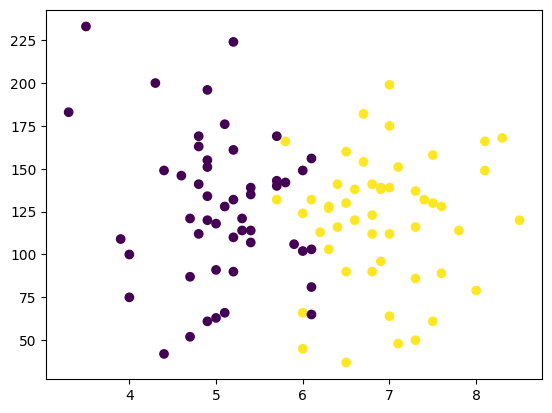

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #to make scatter plot for cgpa and iq relation and giving colour to those placed

In [14]:
x=df.iloc[:,0:2] #to get cgpa and iq cols
y=df.iloc[:,-1] #to get placement col

In [15]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) #to split data with 90% for training and 10%for testing

In [18]:
x_train

,cgpa,iq
64,7.0,64.0
3,7.4,132.0
1,5.9,106.0
87,5.7,132.0
37,8.1,149.0
...,...,...
81,5.4,107.0
61,7.3,137.0
20,6.6,120.0
11,6.9,138.0


In [19]:
x_test

,cgpa,iq
76,4.9,155.0
4,5.8,142.0
78,6.1,81.0
0,6.8,123.0
55,7.8,114.0
39,4.6,146.0
15,5.1,176.0
54,6.4,141.0
45,6.0,66.0
42,7.6,89.0


In [20]:
y_train

64    1
3     1
1     0
87    1
37    1
     ..
81    0
61    1
20    1
11    1
21    1
Name: placement, Length: 90, dtype: int64

In [21]:
y_test

76    0
4     0
78    0
0     1
55    1
39    0
15    0
54    1
45    1
42    1
Name: placement, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler() #made an object

In [24]:
x_train=scaler.fit_transform(x_train)

In [25]:
x_train

array([[ 0.889672  , -1.47669422],
       [ 1.23780452,  0.20781065],
       [-0.06769243, -0.43626474],
       [-0.24175869,  0.20781065],
       [ 1.84703643,  0.62893687],
       [ 0.80263887, -0.68398605],
       [ 0.28044009, -0.51058113],
       [-0.76395748, -1.42714996],
       [ 0.71560574, -0.28763196],
       [-0.93802374,  0.67848113],
       [ 0.45450635,  0.9014303 ],
       [-1.46022252,  1.89231552],
       [-0.93802374,  1.793227  ],
       [-0.85099061, -0.13899918],
       [-0.93802374, -0.08945492],
       [ 0.54153948,  0.35644343],
       [-0.50285809,  0.28212704],
       [ 0.45450635,  0.15826639],
       [-0.24175869,  1.12437948],
       [ 2.19516895, -0.08945492],
       [-1.02505687,  0.43075982],
       [-1.02505687,  1.12437948],
       [ 0.45450635, -2.14554174],
       [ 0.97670513, -1.87304831],
       [-0.67692435, -0.83261883],
       [-0.67692435,  0.92620243],
       [-1.37318939,  0.62893687],
       [ 0.10637383,  0.20781065],
       [-0.93802374,

In [32]:
x_test=scaler.transform(x_test)

In [33]:
x_test

array([[-0.93802374,  0.77756965],
       [-0.15472556,  0.45553195],
       [ 0.10637383, -1.055568  ],
       [ 0.71560574, -0.01513852],
       [ 1.58593704, -0.2380877 ],
       [-1.19912313,  0.55462048],
       [-0.76395748,  1.29778439],
       [ 0.36747322,  0.43075982],
       [ 0.0193407 , -1.42714996],
       [ 1.41187078, -0.85739096]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf=LogisticRegression() #object making

In [36]:
#model training
clf.fit(x_train,y_train) #since clf has all properties

LogisticRegression()

In [39]:
y_pred=clf.predict(x_test)

In [40]:
y_test

76    0
4     0
78    0
0     1
55    1
39    0
15    0
54    1
45    1
42    1
Name: placement, dtype: int64

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.9

In [44]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

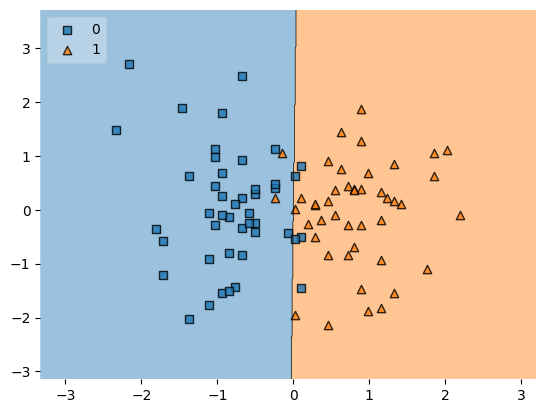

In [48]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)
#converting y into values, x not req as already done in standard scaler
#blue in orange or orange in blue rep mistake

In [46]:
import pickle

In [49]:
pickle.dump(clf,open('model.pkl','wb'))